# Multiclass Logistic Regression

This is an example of multiclass logistic regression used to classify handwritten digits.

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from mltools.generic import OVRClassifier
from mltools.glm import LogisticRegression
from mltools.optimization import NewtonRaphson
from mltools.preprocessing import PCA
from mltools.visualization import pca_label_plot

## Loading the data

We use the [UCI ML handwritten digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), imported from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).
This dataset contains 1797 8x8 samples of handwritten digits.
After shuffling the data, we split it 50/50 into training and testing datasets.

In [2]:
data = load_digits()
x = data.data
y = data.target

np.random.seed(100)
idx = np.random.permutation(y.size)
x_train, x_test = np.array_split(x[idx], 2)
y_train, y_test = np.array_split(y[idx], 2)

## Visualizing the training data

By reducing the training data to 2 dimensions using PCA, we can display a scatter plot of the training features and their labels.

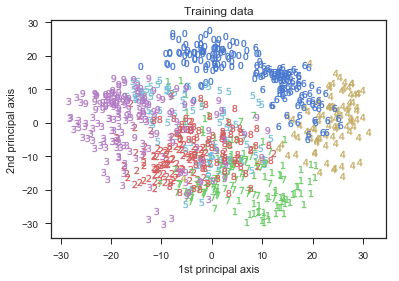

In [3]:
pca = PCA()
pca.fit(x_train)
x_train_2d = pca.transform(x_train, dim=2)

plt.figure()
for label in data.target_names:
    marker = "$" + str(label) + "$"
    idx = y_train == label
    plt.scatter(x_train_2d[idx, 0], x_train_2d[idx, 1], marker=marker)
plt.title("Training data")
plt.xlabel("1st Principal Axis")
plt.ylabel("2nd Principal Axis")
plt.show()
plt.close()

## The multiclass logistic regression model

To make digit predictions, we initialize an `OVRCLassifier` based on the `LogisticRegression` class and fit it using the training data.

In [4]:
%%time
clf = OVRClassifier(base=LogisticRegression, penalty="l2", lam=0.01)
clf.fit(x=x_train, y=y_train, optimizer=NewtonRaphson(iterations=100))

CPU times: user 11.1 s, sys: 1.54 s, total: 12.6 s
Wall time: 7.32 s


Next, we report this model's accuracy on the training and testing data.

In [5]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print(f"Training accuracy: {accuracy_train:.4f}")
print(f"Testing accuracy:  {accuracy_test:.4f}")

Training accuracy: 0.9911
Testing accuracy:  0.9621


## Plotting the predictions

By reducing the testing data to 2 dimensions using PCA, we can display a scatter plot of the test data points and the corresponding predictions.

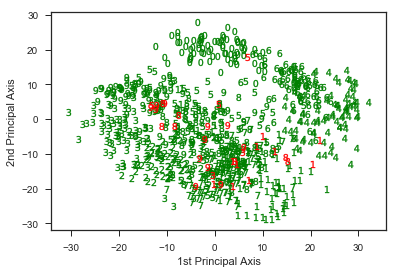

In [6]:
plt.figure()
pca_label_plot(x_test, y_test, pred_test, pca=pca)
plt.show()
plt.close()

## What was misclassified?

Let's see some of the digits in the test set that were classified incorrectly.

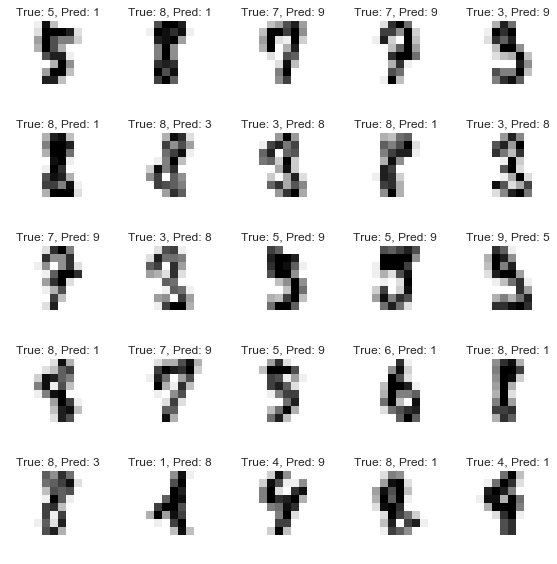

In [7]:
incorrect = y_test != pred_test

nrows = 5
ncols = 5

# Number of misclassified digits to draw
ndigits = min(nrows * ncols, np.sum(incorrect))

_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
k = 0
for i, j in product(range(nrows), range(ncols)):
    while k < len(y_test) and y_test[k] == pred_test[k]:
        k += 1
    if k >= len(y_test):
        break
    label_true = y_test[k]
    label_pred = pred_test[k]
    digit = x_test[k, :].reshape((8, 8))
    axes[i, j].imshow(digit, cmap="binary")
    axes[i, j].axis("off")
    axes[i, j].set_title("True: " + str(label_true) + ", Pred: " + str(label_pred))
    k += 1

plt.tight_layout()
plt.show()
plt.close()